In [221]:
import pandas as pd
import numpy as np

In [222]:
#Reading extracted csv files

shots=pd.read_csv("shots.csv", index_col=0)
dribbles=pd.read_csv("dribbles.csv", index_col=0)
interceptions=pd.read_csv("interceptions.csv", index_col=0)
fouls=pd.read_csv("fouls.csv", index_col=0)
errors=pd.read_csv("errors.csv", index_col=0)
bad=pd.read_csv("bad.csv", index_col=0)
table=pd.read_csv("table.csv", index_col=0)
t6=pd.read_csv("t6.csv", index_col=0)
goals=pd.read_csv("goals.csv", index_col=0)
assists=pd.read_csv("assists.csv", index_col=0)

In [223]:
mets=[shots,dribbles,interceptions,fouls,errors,bad, table, t6, goals, assists]
mts=['shots','dribbles','interceptions','fouls','errors','bad', 'table','t6','goals','assists']

In [224]:
top_six=list(t6.team)

In [225]:
shots.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_key_pass_id',
       'shot_technique', 'shot_body_part', 'shot_outcome', 'shot_type',
       'shot_freeze_frame', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'shot_first_time', 'shot_one_on_one',
       'shot_aerial_won', 'shot_open_goal', 'shot_saved_off_target', 'out',
       'shot_saved_to_post', 'shot_redirect', 'shot_deflected', 'off_camera',
       'shot_follows_dribble'],
      dtype='object')

In [226]:
s_metrics=['player', 'team', 'shot_statsbomb_xg', 'shot_body_part', 'shot_first_time', 'shot_outcome' ]

In [227]:
#Calculating shots/game, xg/game, most_used_technique, goals/shots, aerials_won
shooters=list(goals.player)

In [228]:
shots.shot_outcome.value_counts().index[0]

'Off T'

In [229]:
x=shots[shots.player.isin(shooters)][s_metrics].groupby('player').agg(
    {'shot_statsbomb_xg':'sum',
     'team':'count',
     'shot_body_part':(lambda x:x.value_counts().index[0]), 
     'shot_first_time':(lambda x:x.notnull().sum())
    })

In [230]:
goals=pd.merge(left=goals, right=x, on='player')

In [231]:
goals=goals.sort_values(by='goals', ascending=False)

In [232]:
goals.rename(columns={'team_x':'team', 'team_y':'shots', 'shot_statsbomb_xg':'xg'}, inplace=True)

In [233]:
goals

,team,player,goals,xg,shots,shot_body_part,shot_first_time
0,Tottenham Hotspur,Harry Kane,25,21.635491,158,Right Foot,47
15,Leicester City,Jamie Vardy,24,22.298685,118,Right Foot,34
10,Manchester City,Sergio Leonel Agüero del Castillo,24,17.673074,118,Right Foot,35
16,Leicester City,Riyad Mahrez,17,12.163813,87,Left Foot,19
18,Arsenal,Olivier Giroud,16,13.017703,103,Head,37
19,Arsenal,Alexis Alejandro Sánchez Sánchez,13,11.263074,111,Right Foot,23
3,Southampton,Graziano Pellè,11,7.720268,82,Right Foot,28
7,Manchester United,Anthony Martial,11,6.901340,57,Right Foot,9
4,Southampton,Sadio Mané,11,12.052078,86,Right Foot,27
5,Southampton,Shane Long,10,7.984431,63,Right Foot,19


In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='goals', ylabel='player'>

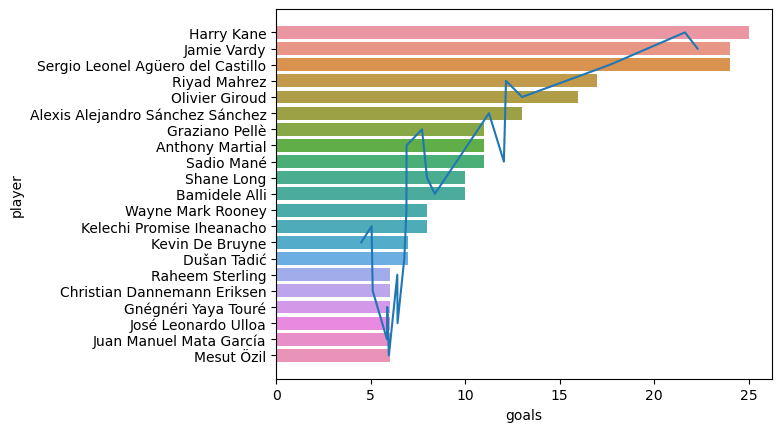

In [248]:
#Plotting XG vs Actual Goals

sns.barplot(x=goals.goals, y=goals.player)
sns.lineplot(x=goals.xg, y=goals.player)


<Axes: xlabel='shots', ylabel='xg'>

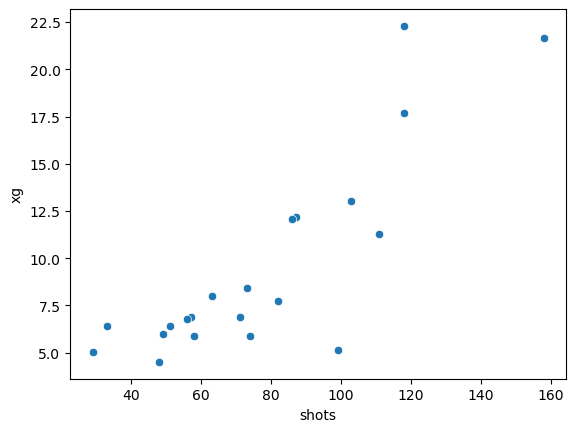

In [255]:
#Plotting shot volume with Xg

sns.scatterplot(x=goals.shots, y=goals.xg)

<Axes: xlabel='goals', ylabel='player'>

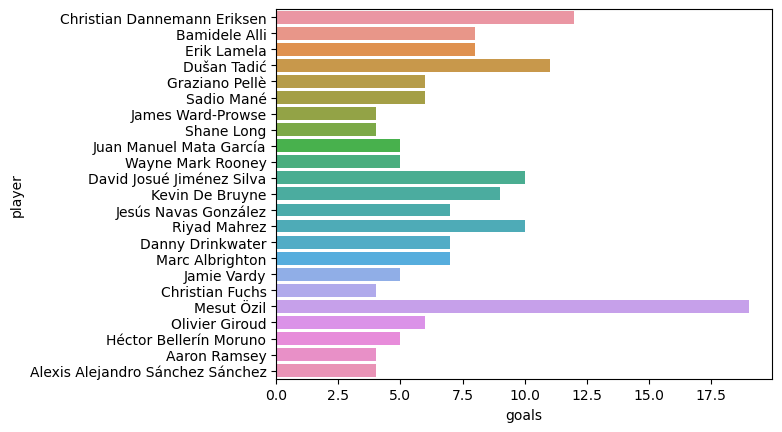

In [347]:
#plotting top assists

sns.barplot(y=assists.player, x=assists.goals)

In [277]:
b=list(t6.columns)
b=b[10:]

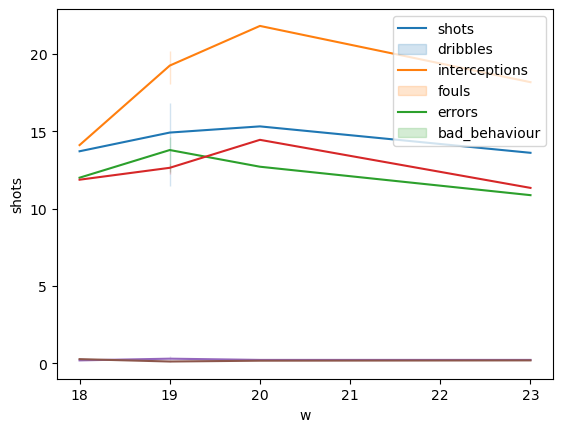

In [282]:
#plotting wins vs shots, dribbles, interceptions, fouls, erros, bad_behaviour

for i in b:
    sns.lineplot(x=t6.w, y=t6[i], legend='auto')
plt.legend(b)

<Axes: xlabel='bad_behaviour', ylabel='team'>

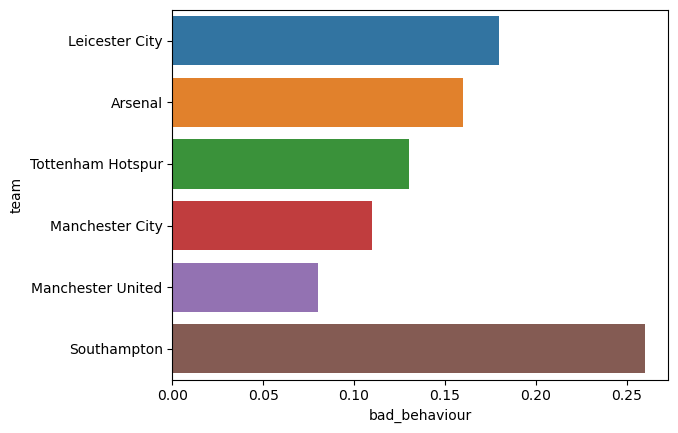

In [299]:
#bad behviour by team

sns.barplot(y=t6.team,x=t6.bad_behaviour)

<Axes: xlabel='dribbles', ylabel='team'>

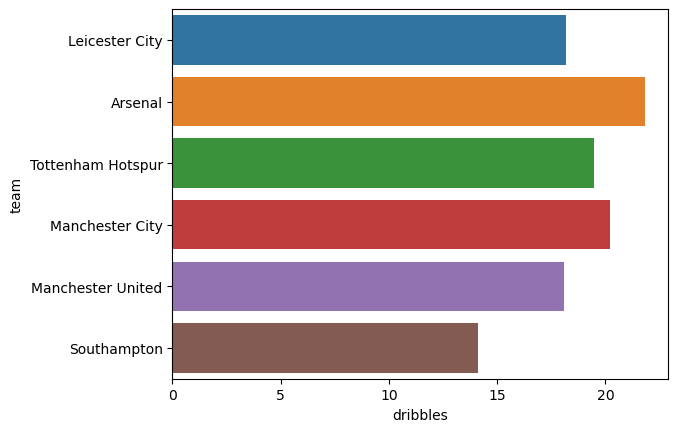

In [320]:
#dribbles by team

sns.barplot(y=t6.team, x=t6.dribbles)